# <center> Bigmart sales prediction</center>
Aim is to build a predictive model and predict the sales of each product at a particular outlet. <br>
Link : https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/#ProblemStatement

In [1]:
#Load required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.lines as lines
from matplotlib.ticker import PercentFormatter
from IPython.display import HTML

In [2]:
#Visualization settings
sns.set_style(style='white')
sns.set(rc={
    'figure.figsize': (12,7),
    'axes.facecolor': 'white',
    'axes.grid': True,
    'grid.color': '.9',
    'axes.linewidth': 1.0,
    'grid.linestyle': u'-'},
    font_scale=1.5)
custom_colors=["#3498db", "#95a5a6","#34495e", "#2ecc71", "#e74c3c"]
sns.set_palette(custom_colors)
background_color='#fbfbfb'

In [3]:
#function for loading input files, as we may need to refresh data several times.
df_train=pd.DataFrame()
df_test = pd.DataFrame()
def load_input_files():
    global df_train,df_test
    #Read input file
    df_train=pd.read_csv('train.csv')
    df_test=pd.read_csv('test.csv')
    
load_input_files()

In [4]:
print ("\nSample train dataframe:\n")
display(df_train.head(3))
print (f"\nShape of train dataframe: {df_train.shape}\n")
display(HTML("Feature names:"))
col_tags ="<ol>"+"".join([f"<li>{col}</li>" for col in df_train.columns]) + "<ol>"
display(HTML(col_tags))
print("\n Dataset summary \n")
print (df_train.info())


Sample train dataframe:



,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700



Shape of train dataframe: (8523, 12)




 Dataset summary 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None


<h4 style="background-color:#fbfbfb;font-family:serif;font-size:160%;">
    Float features   : 4 <br>
    Integer features : 1 <br>
    String features  : 7 <br>
    are present in the training data.
    </h4>

In [5]:
#Missing values in the training data
val = df_train.isnull().sum()
val.sort_values(inplace=True, ascending=False)

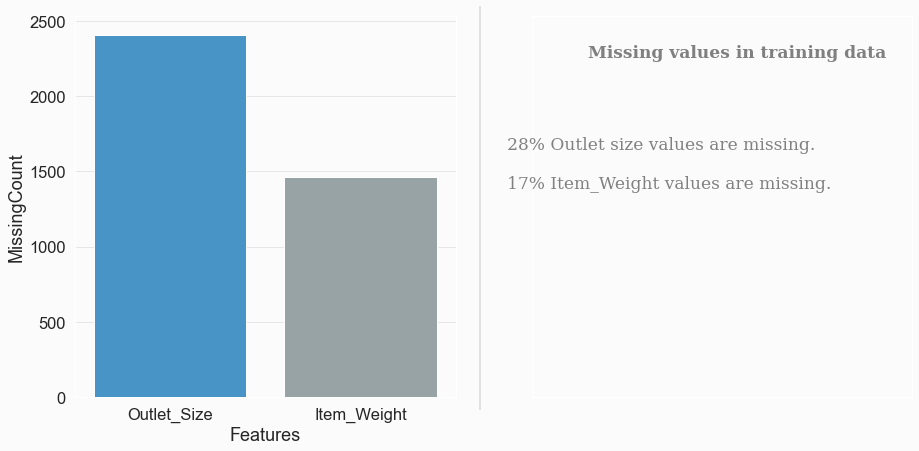

,Features,MissingCount
0,Outlet_Size,2410
1,Item_Weight,1463


In [6]:
df=pd.DataFrame(columns=["Features","MissingCount"])
df['Features']=val.index
df['MissingCount']=val.values
df.drop(df[df['MissingCount']==0].index,inplace=True)

#Create visualization for missing values
fig=plt.figure(figsize=(15,7))
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)
ax1.grid(False)
ax1.set_xticklabels([])
ax1.set_yticklabels([])

fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)

sns.barplot(data=df, x="Features", y="MissingCount", ax=ax0)

#Draw middle line
l1=lines.Line2D([0.5,0.5],[0.1,0.9], color='black', lw=0.2, transform=fig.transFigure)
fig.lines.extend([l1])

#Description
fig.text(x=0.6,
         y=0.8,
         s="Missing values in training data",
         fontweight='bold',
         fontfamily='serif',
         fontsize=17,
         color='grey' )
fig.text(x=0.47,
         y=0.5,
         fontweight='light',
         fontfamily='serif',
         fontsize=17,
         color='grey',
         s='''
           28% Outlet size values are missing.\n
           17% Item_Weight values are missing.
        ''')

plt.show()
display(df)
del(df)


## <center>Feature Analysis</center>

In [7]:
#Discrete feature analysis
def analyze_discrete_feature(fld,display_graph=True):
    print ("Sample data:\n")
    display(fld.head())
    df=pd.DataFrame({"Value": fld.value_counts().index,
                 "Count":fld.value_counts().values})
    print ("\nNull value count : ", fld.isnull().sum())
    unique_list=fld.unique().tolist()
    print ("\nUnique values: ", unique_list)
    print ("\n Unique values count: ", len(unique_list))
    print ("\nValue counts:\n",    df)
    if display_graph==True:
        plt.subplots(figsize=(25,10),facecolor=background_color)
        plt.subplot(2,2,1)
        plt.pie(fld.value_counts(),labels=fld.value_counts().index,autopct=lambda x: f'{x: .2f}%');
        plt.xticks(rotation=90)

        plt.subplot(2,2,2)   
        sns.barplot(data=df, x="Value",y="Count").set_facecolor(background_color);
        plt.xticks(rotation=90);
        plt.suptitle(fld.name + " -distribution");

        plt.show()
        plt.close()
    display(HTML("<h4 style='background-color:#fbfbfb;font-family:serif;font-size:160%'>Discrete variable</h4>"))

In [8]:
#Continuous feature analysis
def analyze_continuous_feature(fld):
    print ("Sample data:\n",df_train.Item_Weight.head())
    print ("\nNull value count : ", fld.isnull().sum())
    print ("\n", fld.describe())
    print (f"\n Skewness : {fld.skew()} \n")
    plt.subplots(figsize=(25,10))
    plt.subplot(2,2,1)
    plt.hist(fld)
    plt.subplot(2,2,2)
    sns.boxplot(fld)
    plt.suptitle(fld.name + "-distribution")
    plt.show()
    plt.close()
    display(HTML("<h4 style='background-color:#fbfbfb;font-family:serif;font-size:160%'>Continuous variable</h4>"))

## 1. Item_Identifier
	Unique product ID

In [9]:
print ("Sample data :\n")
display (df_train.Item_Identifier.head())
print (f"\nNumber of unique values : {df_train.Item_Identifier.nunique()}")



Sample data :



0    FDA15
1    DRC01
2    FDN15
3    FDX07
4    NCD19
Name: Item_Identifier, dtype: object


Number of unique values : 1559


<h4 style="background-color:#fbfbfb;font-family:serif;font-size:160%;">
    Looks like just an identifier column. Doesn't seems like much value for out model building.</h4>

## 2. Item_weight
	Weight of product

Sample data:
 0     9.30
1     5.92
2    17.50
3    19.20
4     8.93
Name: Item_Weight, dtype: float64

Null value count :  1463

 count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

 Skewness : 0.0824262091221237 



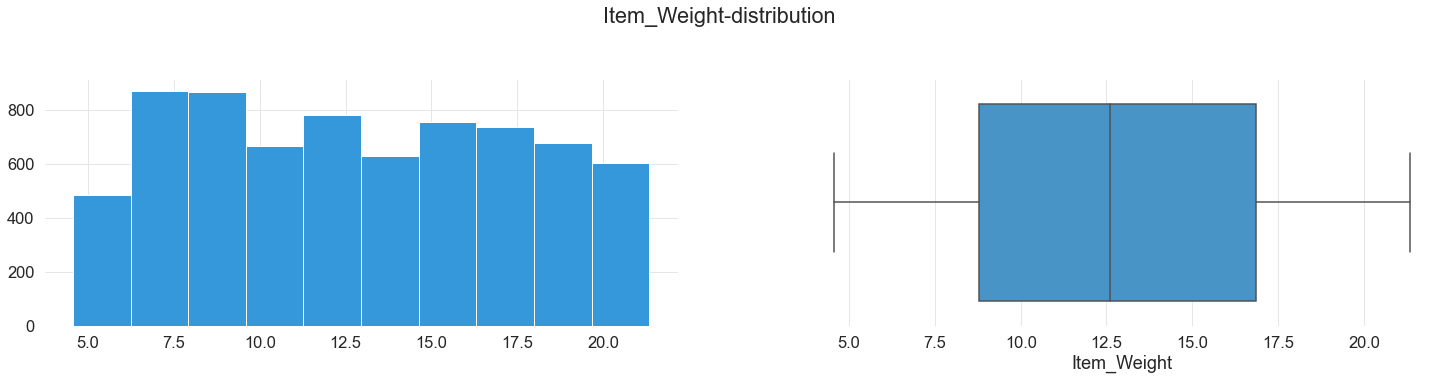

In [10]:
analyze_continuous_feature(df_train.Item_Weight)

<h4 style="background-color:#fbfbfb;font-family:serif;font-size:160%;">
    Item weight is decimal feature ranging from 4.5 to 21.35<br>
    </h4>

## 3. Item_Fat_Content
	Whether the product is low fat or not

Sample data:



0    Low Fat
1    Regular
2    Low Fat
3    Regular
4    Low Fat
Name: Item_Fat_Content, dtype: object


Null value count :  0

Unique values:  ['Low Fat', 'Regular', 'low fat', 'LF', 'reg']

 Unique values count:  5

Value counts:
      Value  Count
0  Low Fat   5089
1  Regular   2889
2       LF    316
3      reg    117
4  low fat    112


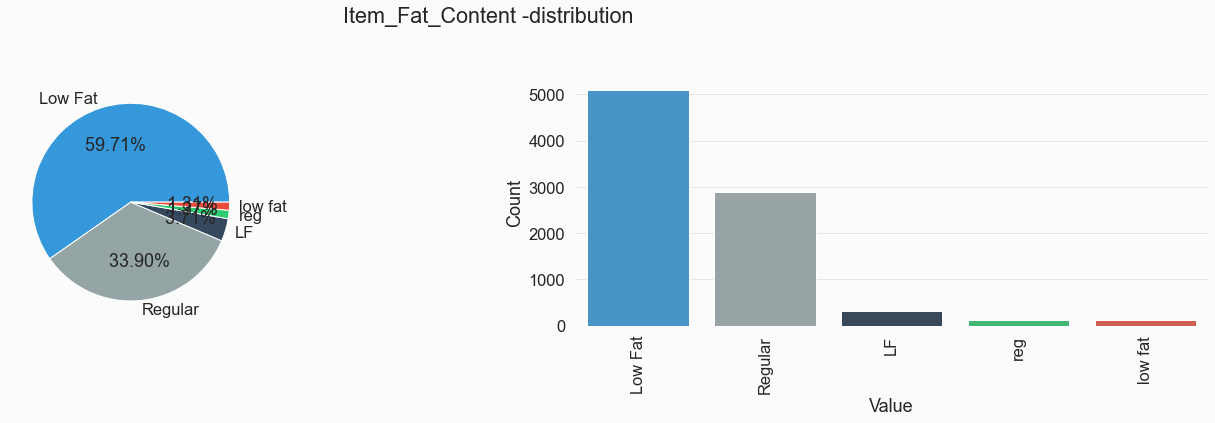

In [11]:
analyze_discrete_feature(df_train.Item_Fat_Content)

<h4 style="background-color:#fbfbfb;font-family:serif;font-size:160%;">
Almost 60% pf the items are with low fat content.
</h4>

## 4. Item_Visibility 
	The % of total display area of all products in a store allocated to the particular product

Sample data:
 0     9.30
1     5.92
2    17.50
3    19.20
4     8.93
Name: Item_Weight, dtype: float64

Null value count :  0

 count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

 Skewness : 1.1670905496918407 



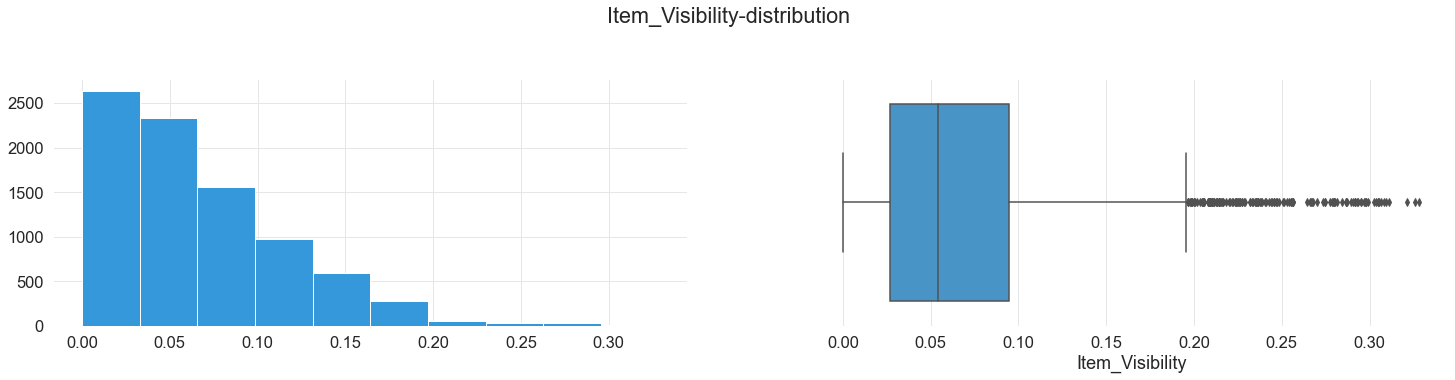

In [12]:
analyze_continuous_feature(df_train.Item_Visibility)

## 5. Item_Type
	The category to which the product belongs

Sample data:



0                    Dairy
1              Soft Drinks
2                     Meat
3    Fruits and Vegetables
4                Household
Name: Item_Type, dtype: object


Null value count :  0

Unique values:  ['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables', 'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods', 'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned', 'Breads', 'Starchy Foods', 'Others', 'Seafood']

 Unique values count:  16

Value counts:
                     Value  Count
0   Fruits and Vegetables   1232
1             Snack Foods   1200
2               Household    910
3            Frozen Foods    856
4                   Dairy    682
5                  Canned    649
6            Baking Goods    648
7      Health and Hygiene    520
8             Soft Drinks    445
9                    Meat    425
10                 Breads    251
11            Hard Drinks    214
12                 Others    169
13          Starchy Foods    148
14              Breakfast    110
15                Seafood     64


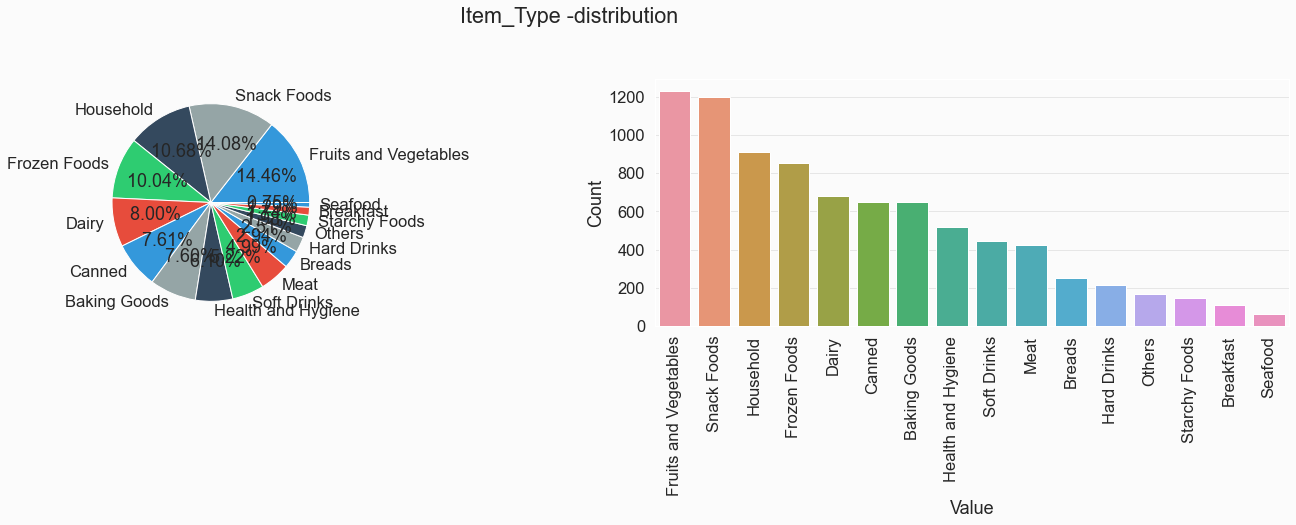

In [13]:
analyze_discrete_feature(df_train.Item_Type)

## 6. Item_MRP
	Maximum Retail Price (list price) of the product

Sample data:
 0     9.30
1     5.92
2    17.50
3    19.20
4     8.93
Name: Item_Weight, dtype: float64

Null value count :  0

 count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64

 Skewness : 0.1272022683110526 



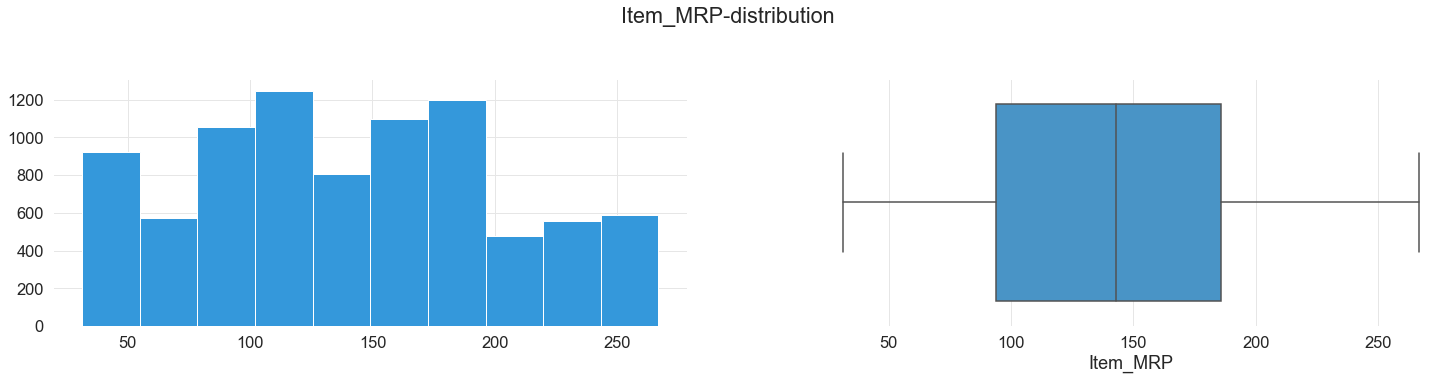

In [14]:
analyze_continuous_feature(df_train.Item_MRP)

<h4 style="background-color:#fbfbfb;font-family:serif;font-size:160%;">
MRP is ranging from 31.2 to 266.8
</h4>

## 7. Outlet_Identifier
Unique store ID

Sample data:



0    OUT049
1    OUT018
2    OUT049
3    OUT010
4    OUT013
Name: Outlet_Identifier, dtype: object


Null value count :  0

Unique values:  ['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045', 'OUT017', 'OUT046', 'OUT035', 'OUT019']

 Unique values count:  10

Value counts:
     Value  Count
0  OUT027    935
1  OUT013    932
2  OUT046    930
3  OUT049    930
4  OUT035    930
5  OUT045    929
6  OUT018    928
7  OUT017    926
8  OUT010    555
9  OUT019    528


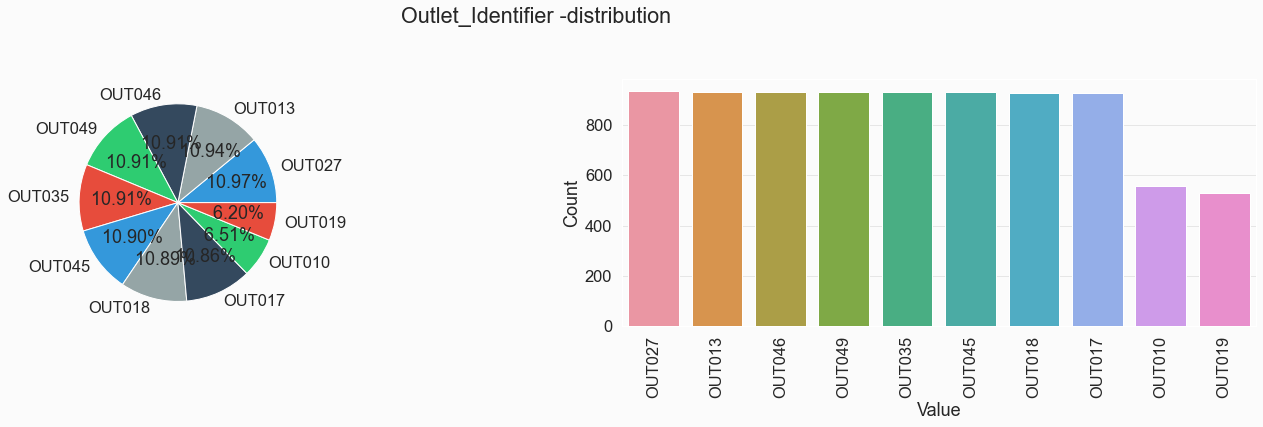

In [15]:
analyze_discrete_feature(df_train.Outlet_Identifier)

<h4 style="background-color:#fbfbfb;font-family:serif;font-size:160%;">
    Looks like almost all the outlets are in uniform distribution except OUT010 and OUT019.
    </h4>

## 8. Outlet_Establishment_Year
	The year in which store was established

Sample data:



0    1999
1    2009
2    1999
3    1998
4    1987
Name: Outlet_Establishment_Year, dtype: int64


Null value count :  0

Unique values:  [1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004]

 Unique values count:  9

Value counts:
    Value  Count
0   1985   1463
1   1987    932
2   1999    930
3   1997    930
4   2004    930
5   2002    929
6   2009    928
7   2007    926
8   1998    555


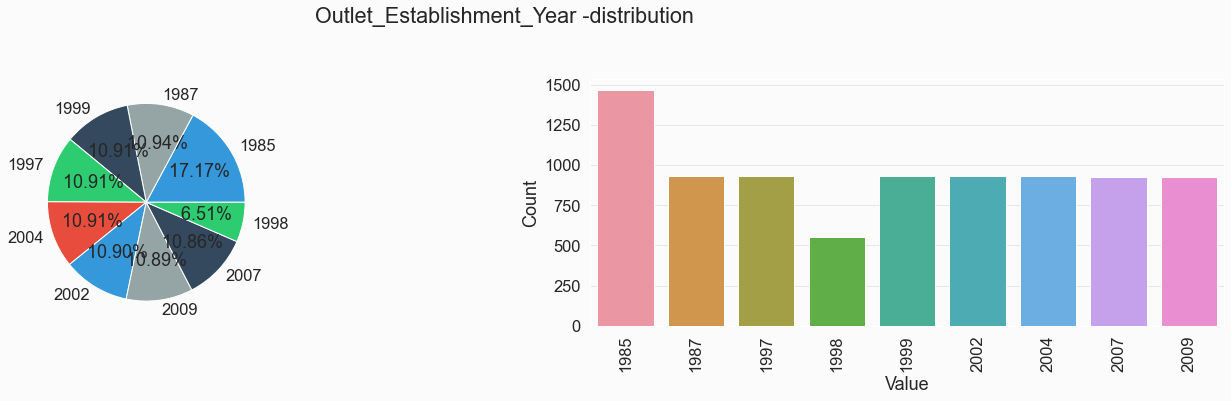

In [16]:
analyze_discrete_feature(df_train.Outlet_Establishment_Year)

<h4 style="background-color:#fbfbfb;font-family:serif;font-size:160%;">
    Compararitively there are more Outlets which established on 1985. <br>
    All other outlets are established uniformily except the one established on 1998.<br>
    </h4>

## 9. Outlet_Size
The size of the store in terms of ground area covered

Sample data:



0    Medium
1    Medium
2    Medium
3       NaN
4      High
Name: Outlet_Size, dtype: object


Null value count :  2410

Unique values:  ['Medium', nan, 'High', 'Small']

 Unique values count:  4

Value counts:
     Value  Count
0  Medium   2793
1   Small   2388
2    High    932


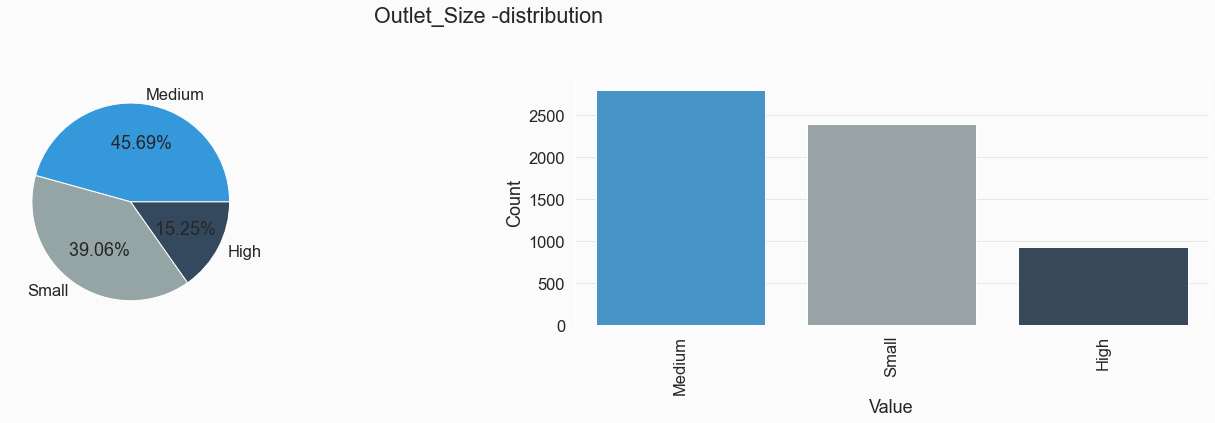

In [17]:
analyze_discrete_feature(df_train.Outlet_Size)

<h4 style="background-color:#fbfbfb;font-family:serif;font-size:160%;">
    Most of the outlets are medium sized.
    </h4>

## 10. Outlet_Location_Type
	The type of city in which the store is located

Sample data:



0    Tier 1
1    Tier 3
2    Tier 1
3    Tier 3
4    Tier 3
Name: Outlet_Location_Type, dtype: object


Null value count :  0

Unique values:  ['Tier 1', 'Tier 3', 'Tier 2']

 Unique values count:  3

Value counts:
     Value  Count
0  Tier 3   3350
1  Tier 2   2785
2  Tier 1   2388


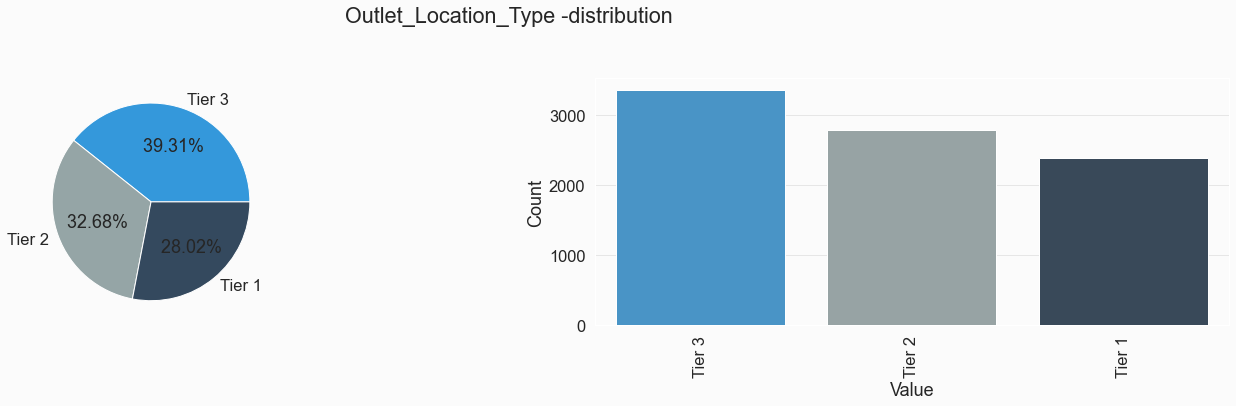

In [18]:
analyze_discrete_feature(df_train.Outlet_Location_Type)

<h4 style="background-color:#fbfbfb;font-family:serif;font-size:160%;">
    Most of the outlets are located in Tier3 location type.
    </h4>

## 11. Outlet_Type
Whether the outlet is just a grocery store or some sort of supermarket

Sample data:



0    Supermarket Type1
1    Supermarket Type2
2    Supermarket Type1
3        Grocery Store
4    Supermarket Type1
Name: Outlet_Type, dtype: object


Null value count :  0

Unique values:  ['Supermarket Type1', 'Supermarket Type2', 'Grocery Store', 'Supermarket Type3']

 Unique values count:  4

Value counts:
                Value  Count
0  Supermarket Type1   5577
1      Grocery Store   1083
2  Supermarket Type3    935
3  Supermarket Type2    928


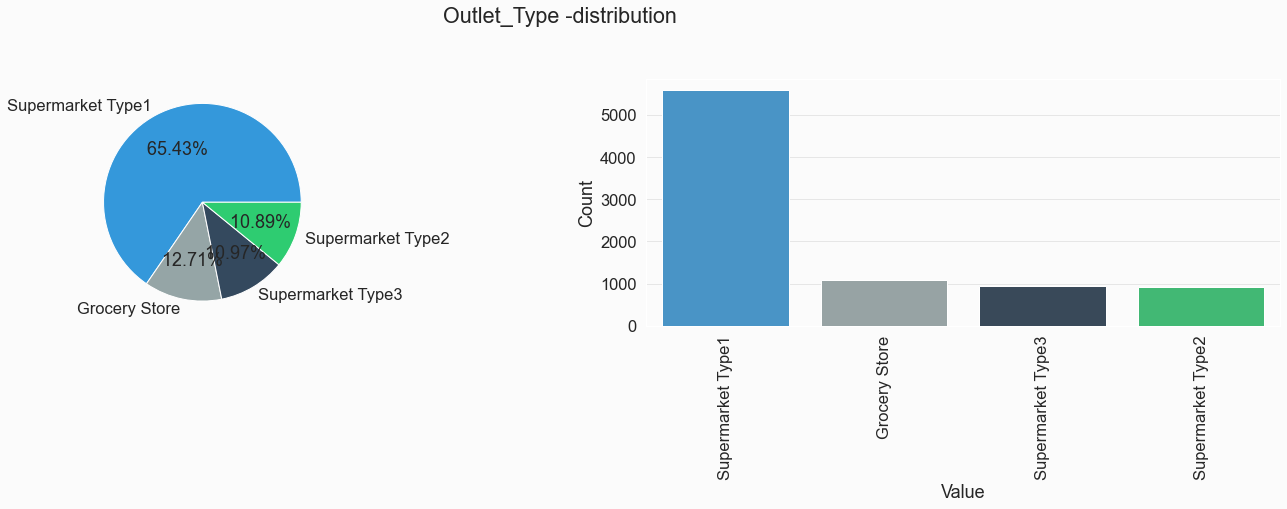

In [19]:
analyze_discrete_feature(df_train.Outlet_Type)

<h4 style="background-color:#fbfbfb;font-family:serif;font-size:160%;">
    65% Outlets are type of Supermarket type1.
    </h4>
    

## 12. Item_Outlet_Sales
Sales of the product in the particular store. This is the outcome variable to be predicted.

Sample data:
 0     9.30
1     5.92
2    17.50
3    19.20
4     8.93
Name: Item_Weight, dtype: float64

Null value count :  0

 count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

 Skewness : 1.1775306028542798 



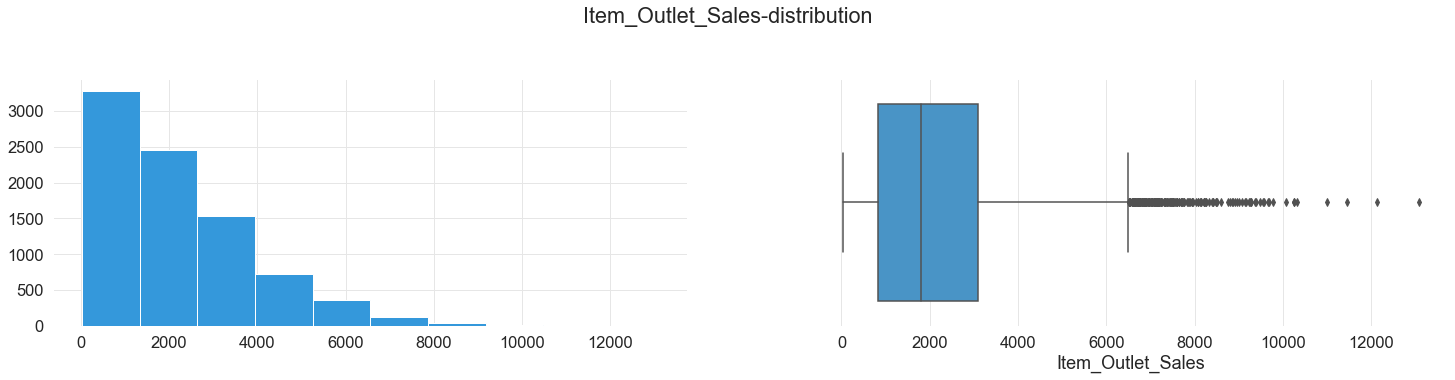

In [20]:
analyze_continuous_feature(df_train.Item_Outlet_Sales)

<h4 style="background-color:#fbfbfb;font-family:serif;font-size:160%;">
    Positively skewed.
    </h4>

## <center> Missing values treatment </center>

In [21]:
#Store the target feature for future use.
target = df_train.Item_Outlet_Sales

#Combining test and training data for imputing missing values.
df_total=df_train.drop("Item_Outlet_Sales", axis=1).copy()
 
#Changing the index of df_test, for creating a total dataframe by appending to training data frame.
start_index = df_train.index.max()+1
end_index = df_test.index.max()+1
#Storing test index retrieve data later.
new_index_list=list(range(start_index,start_index+end_index))

#Assigning new index, which is starting from end of training index.
df_test.index=new_index_list

#df_total=df_train + df_test
df_total=pd.concat([df_total,df_test],axis=0)
print (f"\nShape total data frame:{df_total.shape}\n")


Shape total data frame:(14204, 11)



In [22]:
#Print missing value counts
dummy = df_total.isnull().sum()
dummy=dummy.to_frame().reset_index()
dummy.rename(columns={0:"Count","index":"Feature"},inplace=True)
print ("\n Missing value counts: \n")
display(dummy.query('Count != 0'))


 Missing value counts: 



,Feature,Count
1,Item_Weight,2439
8,Outlet_Size,4016


In [23]:
#Group data based on Item_Type and find the mean value of Item_Weight for each size.
grouped=df_total.groupby("Item_Type")
mean_weight_values=grouped.Item_Weight.aggregate("mean")

#Group Outlet_Type and find Mod value of Outlet_Size for each group.
grouped=df_total.groupby("Outlet_Type")
mean_outlet_size=grouped.Outlet_Size.aggregate(pd.Series.mode)

In [24]:
#Fill the missing values with aggregate values.

for item in mean_weight_values.index:
    mean_weight = mean_weight_values[item]
    #print (f"Mean weight for {item} is {mean_weight}")
    item_weight=df_total[df_total['Item_Type']==item]['Item_Weight']
    item_weight.fillna(mean_weight,inplace=True)
    df_total.loc[item_weight.index,"Item_Weight"]=item_weight.values
    
for type in mean_outlet_size.index:
    mean_size = mean_outlet_size[type]
    outlet_size=df_total[df_total['Outlet_Type']==type]['Outlet_Size']
    outlet_size.fillna(mean_size,inplace=True)
    df_total.loc[outlet_size.index,"Outlet_Size"]=outlet_size.values

In [25]:
#Print missing value counts
dummy = df_total.isnull().sum()
dummy=dummy.to_frame().reset_index()
dummy.rename(columns={0:"Count","index":"Feature"},inplace=True)
print ("\n Missing value counts: \n")
display(dummy.query('Count != 0'))


 Missing value counts: 



,Feature,Count


In [26]:
#Retrieve mofified train and test data
df_test=df_total.loc[new_index_list]
df_train=df_total.loc[df_train.index]
df_train["Item_Outlet_Sale"]=target

In [27]:
#Remove duplicate values for Item fat content.
df_train['Item_Fat_Content'].replace('reg','Regular',inplace=True)
df_train['Item_Fat_Content'].replace(['LF','low fat'],'Low Fat',inplace=True)

## <center>Feature relations in training dataset</center>

## 1. Item_Fat_Content, Item_Type

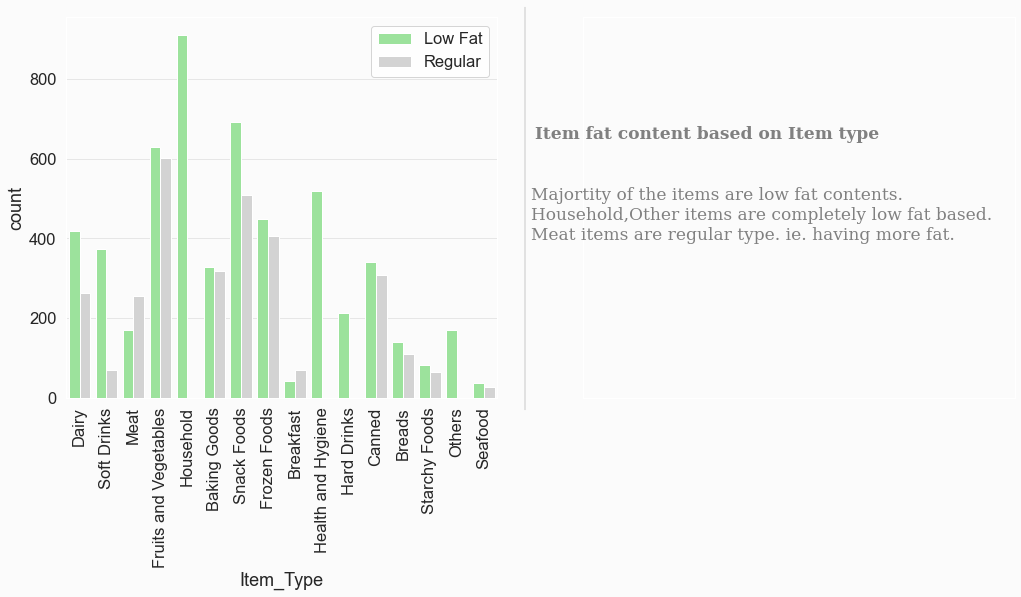

In [28]:
#Visualization
fig=plt.figure(figsize=(17,7));

ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)
ax1.grid(False)
ax1.set_xticklabels([])
ax1.set_yticklabels([])

fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)

#Plot the countplot
sns.countplot(data=df_train,x="Item_Type",hue="Item_Fat_Content",palette=['lightgreen','lightgrey'],ax=ax0);
ax0.legend(loc="upper right")

#rotating the ticklabels in x axis
for tick in ax0.get_xticklabels():
    tick.set_rotation(90)
    

#Draw line in the middle    
l1= lines.Line2D([0.5,0.5],[0.1, 0.9],color='black',lw=0.2,transform=fig.transFigure)
fig.lines.extend([l1])

#heading content
fig.text(x=0.47,
        y=0.6,
        fontweight='bold',
        fontfamily='serif',
        fontsize=17,
        color='grey',
        s='''
        Item fat content based on Item type
        ''')
#text content
fig.text(x=0.47,
        y=0.4,
        fontweight='light',
        fontfamily='serif',
        fontsize=17,
        color='grey',
        s='''
        Majortity of the items are low fat contents.
        Household,Other items are completely low fat based.
        Meat items are regular type. ie. having more fat.
        '''        )
plt.show()

## 2. Item_Visibility,Outlet_Size,Item_Outlet_Sales
Is there any relation between item display area and sales?

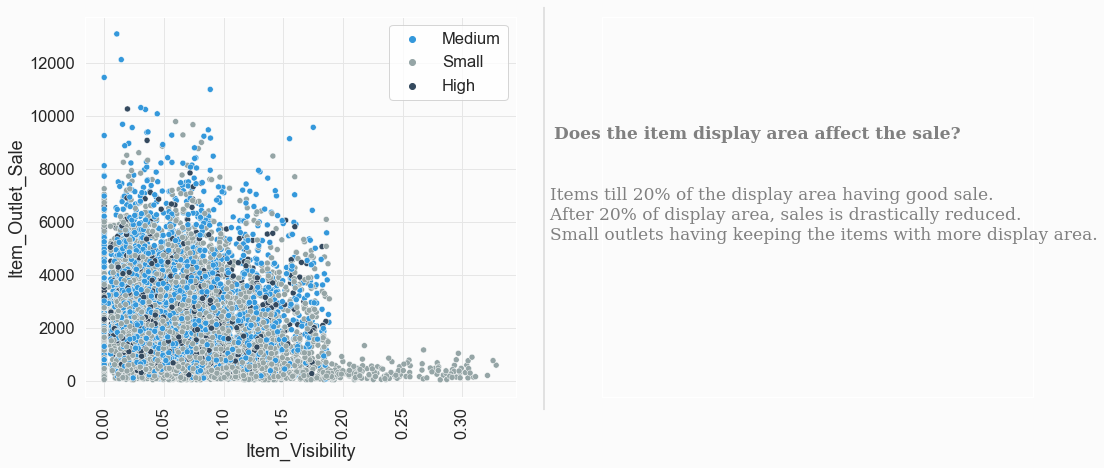

In [29]:
#Visualization
fig=plt.figure(figsize=(17,7));

ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)
ax1.grid(False)
ax1.set_xticklabels([])
ax1.set_yticklabels([])

fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)

#Plot the countplot
sns.scatterplot(data=df_train,x="Item_Visibility",y="Item_Outlet_Sale",hue="Outlet_Size",ax=ax0);
ax0.legend(loc="upper right")

#rotating the ticklabels in x axis
for tick in ax0.get_xticklabels():
    tick.set_rotation(90)
    

#Draw line in the middle    
l1= lines.Line2D([0.5,0.5],[0.1, 0.9],color='black',lw=0.2,transform=fig.transFigure)
fig.lines.extend([l1])

#heading content
fig.text(x=0.47,
        y=0.6,
        fontweight='bold',
        fontfamily='serif',
        fontsize=17,
        color='grey',
        s='''
        Does the item display area affect the sale?
        ''')
#text content
fig.text(x=0.47,
        y=0.4,
        fontweight='light',
        fontfamily='serif',
        fontsize=17,
        color='grey',
        s='''
        Items till 20% of the display area having good sale.
        After 20% of display area, sales is drastically reduced.
        Small outlets having keeping the items with more display area.
        '''        )
plt.show()

## 3. Item type, Item sales
Which Item type having more sales?

In [30]:
df=df_train.loc[:,["Item_Type","Item_Outlet_Sale"]]

#df_sale=df.groupby("Item_Type",as_index=False).agg({'Item_Outlet_Sale':sum})
df_sale=df.groupby("Item_Type").agg({'Item_Outlet_Sale':sum})

df_sale.sort_values("Item_Outlet_Sale",inplace=True,ascending=False)
#display(df_sale)

#Cumilative percent.
cum_percent=df_sale.Item_Outlet_Sale.cumsum()/df_sale.Item_Outlet_Sale.sum()*100
#display(cum_percent)

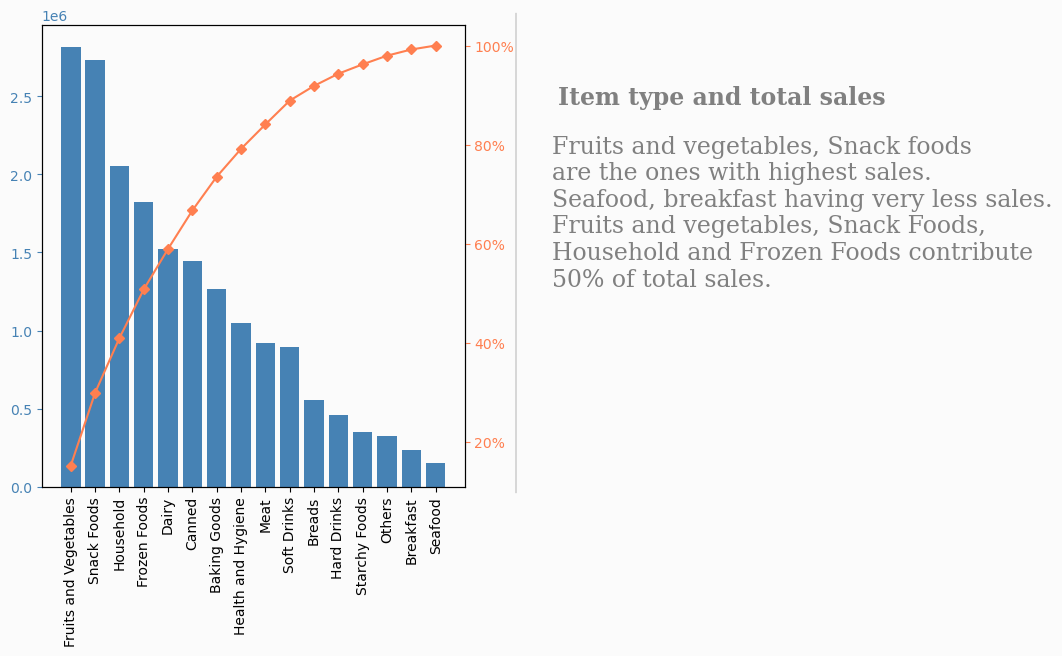

In [32]:
sns.reset_defaults()

#Visualization
fig=plt.figure(figsize=(12,6));

ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)
ax1.grid(False)
ax1.set_xticklabels([])
ax1.set_yticklabels([])

fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)
ax1.spines["bottom"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.tick_params(left=False,bottom=False)

#Plot the barplot
ax0.bar(df_sale.index,df_sale.Item_Outlet_Sale,color='steelblue');
ax0.tick_params(axis='y', colors='steelblue')

ax2=ax0.twinx()
ax2.plot(cum_percent.index,cum_percent.values,color='coral',marker='D',ms=5)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.tick_params(axis='y',colors='coral')

#rotating the ticklabels in x axis
for tick in ax0.get_xticklabels():
    tick.set_rotation(90)
    
#Draw line in the middle    
l1= lines.Line2D([0.52,0.52],[0.1, 0.9],color='black',lw=0.2,transform=fig.transFigure)
fig.lines.extend([l1])

#heading content
fig.text(x=0.5,
        y=0.7,
        fontweight='bold',
        fontfamily='serif',
        fontsize=17,
        color='grey',
        s='''
        Item type and total sales
        ''')
#text content
fig.text(x=0.5,
        y=0.4,
        fontweight='light',
        fontfamily='serif',
        fontsize=17,
        color='grey',
        s='''
        Fruits and vegetables, Snack foods 
        are the ones with highest sales.
        Seafood, breakfast having very less sales.
        Fruits and vegetables, Snack Foods,
        Household and Frozen Foods contribute
        50% of total sales.
        ''')
plt.show()

## 4. Outlet type, Outlet location

In [51]:
#Value counts for the combination of location type and outlet type.
df=df_train.loc[:,["Outlet_Location_Type","Outlet_Type"]].value_counts().reset_index()
df.rename(columns={0:'Count'},inplace=True)
display(df)

,Outlet_Location_Type,Outlet_Type,Count
0,Tier 2,Supermarket Type1,2785
1,Tier 1,Supermarket Type1,1860
2,Tier 3,Supermarket Type3,935
3,Tier 3,Supermarket Type1,932
4,Tier 3,Supermarket Type2,928
5,Tier 3,Grocery Store,555
6,Tier 1,Grocery Store,528


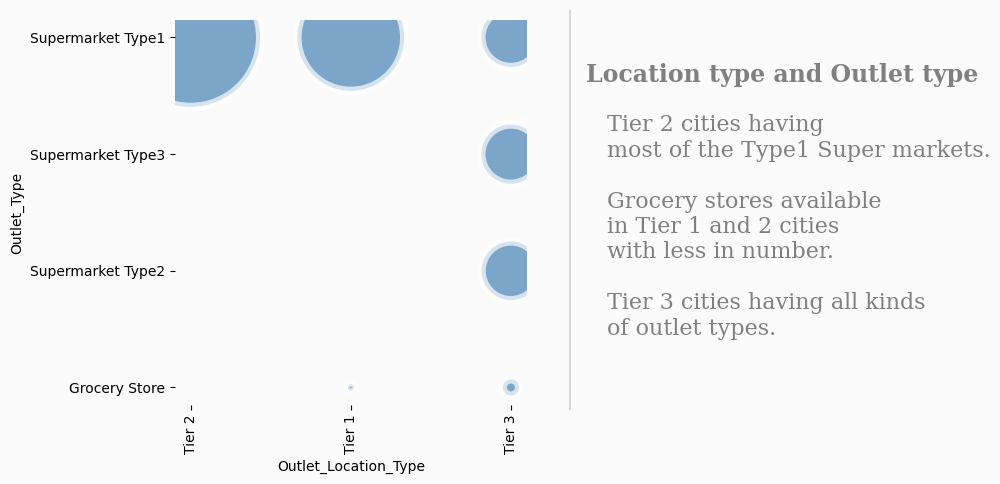

In [111]:
sns.reset_defaults()

#Visualization
fig=plt.figure(figsize=(10,5));

ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)
ax1.grid(False)
ax1.set_xticklabels([])
ax1.set_yticklabels([])

fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)
ax0.spines["bottom"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax1.spines["bottom"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.tick_params(left=False,bottom=False)

#Plot the barplot
sns.scatterplot(data=df,x="Outlet_Location_Type",y="Outlet_Type", size="Count",sizes=(20,10000),color='steelblue',alpha=0.7,legend=False,linewidth=6,ax=ax0);

#rotating the ticklabels in x axis
for tick in ax0.get_xticklabels():
    tick.set_rotation(90)
    
#Draw line in the middle    
l1= lines.Line2D([0.52,0.52],[0.1, 0.9],color='black',lw=0.2,transform=fig.transFigure)
fig.lines.extend([l1])

#heading content
fig.text(x=0.47,
        y=0.7,
        fontweight='bold',
        fontfamily='serif',
        fontsize=17,
        color='grey',
        s='''
        Location type and Outlet type
        ''')
#text content
fig.text(x=0.5,
        y=0.2,
        fontweight='light',
        fontfamily='serif',
        fontsize=16,
        color='grey',
        s='''
        Tier 2 cities having 
        most of the Type1 Super markets.
        
        Grocery stores available 
        in Tier 1 and 2 cities 
        with less in number.
        
        Tier 3 cities having all kinds 
        of outlet types.
        ''')
plt.show()

## 5. Location type and Item_Outlet_Sales

In [140]:
df=df_train.loc[:,["Outlet_Location_Type","Item_Outlet_Sale"]]
#Find total of Item_Outlet_Sale based on Location type
df=df.groupby('Outlet_Location_Type').agg({"Item_Outlet_Sale":sum})
df.reset_index(inplace=True)

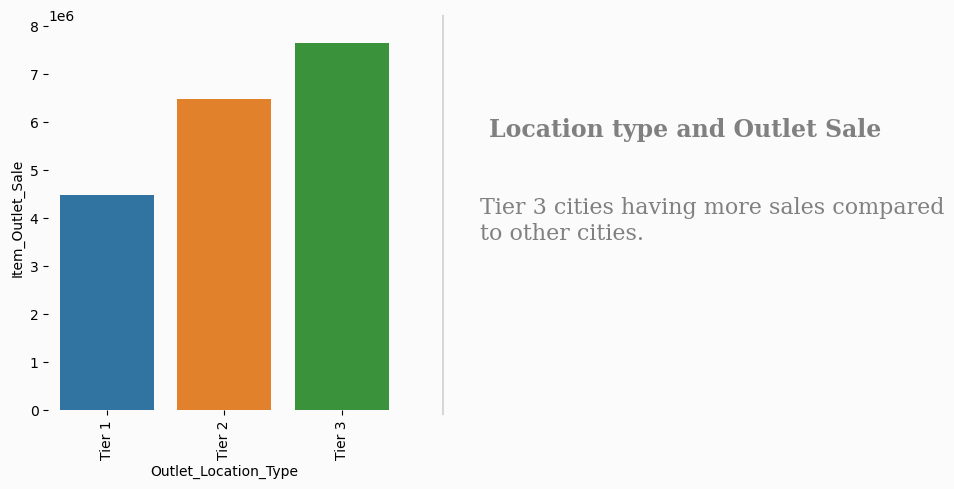

In [147]:
sns.reset_defaults()

#Visualization
fig=plt.figure(figsize=(10,5));

ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)
ax1.grid(False)
ax1.set_xticklabels([])
ax1.set_yticklabels([])

fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)
ax0.spines["bottom"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax1.spines["bottom"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.tick_params(left=False,bottom=False)

#Plot the barplot
sns.barplot(data=df,x='Outlet_Location_Type',y='Item_Outlet_Sale',estimator=sum,ax=ax0)

#rotating the ticklabels in x axis
for tick in ax0.get_xticklabels():
    tick.set_rotation(90)
    
#Draw line in the middle    
l1= lines.Line2D([0.52,0.52],[0.1, 0.9],color='black',lw=0.2,transform=fig.transFigure)
fig.lines.extend([l1])

#heading content
fig.text(x=0.5,
        y=0.6,
        fontweight='bold',
        fontfamily='serif',
        fontsize=17,
        color='grey',
        s='''
        Location type and Outlet Sale
        ''')
#text content
fig.text(x=0.5,
        y=0.4,
        fontweight='light',
        fontfamily='serif',
        fontsize=16,
        color='grey',
        s='''
        Tier 3 cities having more sales compared
        to other cities.
        ''')
plt.show()

## 6. Outlet types based on established year

In [163]:
df=df_train.loc[:,["Outlet_Type","Outlet_Establishment_Year"]]

In [164]:
df=df.value_counts().to_frame().reset_index()

In [167]:
df.rename(columns={0:"Count"},inplace=True)

In [168]:
df

,Outlet_Type,Outlet_Establishment_Year,Count
0,Supermarket Type3,1985,935
1,Supermarket Type1,1987,932
2,Supermarket Type1,2004,930
3,Supermarket Type1,1999,930
4,Supermarket Type1,1997,930
5,Supermarket Type1,2002,929
6,Supermarket Type2,2009,928
7,Supermarket Type1,2007,926
8,Grocery Store,1998,555
9,Grocery Store,1985,528


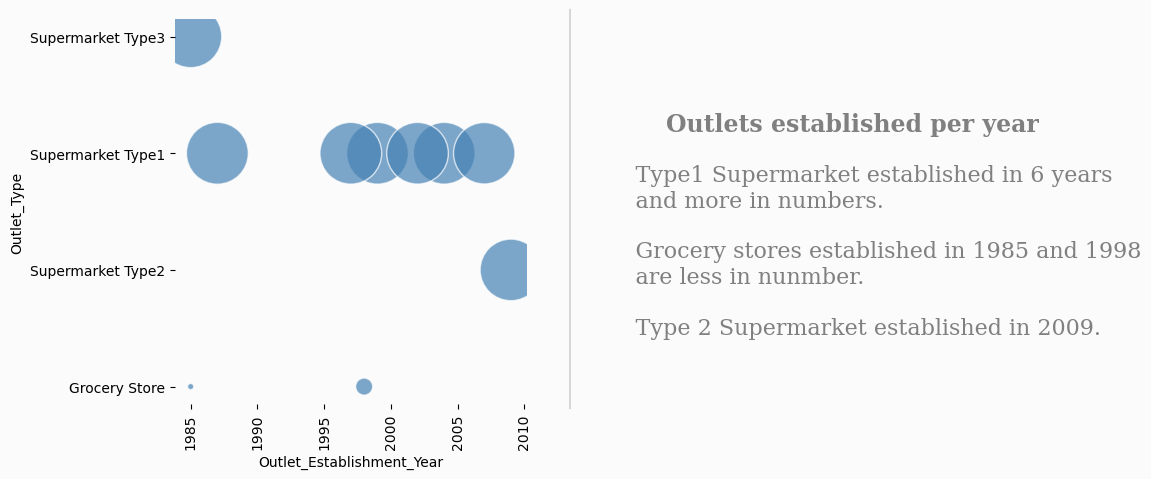

In [193]:
sns.reset_defaults()

#Visualization
fig=plt.figure(figsize=(10,5));

ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)
ax1.grid(False)
ax1.set_xticklabels([])
ax1.set_yticklabels([])

fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)
ax0.spines["bottom"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax1.spines["bottom"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.tick_params(left=False,bottom=False)

#Plot the barplot
sns.scatterplot(data=df,x="Outlet_Establishment_Year",y="Outlet_Type",size="Count",sizes=(20,2000),legend=False,color='steelblue',alpha=0.7,linewidth=1,ax=ax0);

#rotating the ticklabels in x axis
for tick in ax0.get_xticklabels():
    tick.set_rotation(90)
    
#Draw line in the middle    
l1= lines.Line2D([0.52,0.52],[0.1, 0.9],color='black',lw=0.2,transform=fig.transFigure)
fig.lines.extend([l1])

#heading content
fig.text(x=0.55,
        y=0.6,
        fontweight='bold',
        fontfamily='serif',
        fontsize=17,
        color='grey',
        s='''
        Outlets established per year
        ''')
#text content
fig.text(x=0.5,
        y=0.2,
        fontweight='light',
        fontfamily='serif',
        fontsize=16,
        color='grey',
        s='''
            Type1 Supermarket established in 6 years
            and more in numbers.
            
            Grocery stores established in 1985 and 1998
            are less in nunmber.
            
            Type 2 Supermarket established in 2009.
        ''')
plt.show()